In [ ]:
yimport numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('Kanpur_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Kanpur_dataset.csv")
data.head()

,datetime,precipitation,tempmax,tempmin,wind,weather
0,01-01-2020,0.0,19.5,4.0,13.0,RainCloudy
1,02-01-2020,0.0,22.6,9.0,11.2,RainCloudy
2,03-01-2020,23.0,20.1,12.1,14.8,RainCloudy
3,04-01-2020,0.0,19.3,11.0,9.4,RainCloudy
4,05-01-2020,0.0,20.0,12.0,13.0,RainCloudy


In [ ]:
data.shape

(731, 6)

In [ ]:
sns.countplot("weather",data=data,palette="hls")

TypeError: ignored

In [ ]:
countrain=len(data[data.weather=="RainCloudy"])
countsun=len(data[data.weather=="Clear"])
countdrizzle=len(data[data.weather=="Rain"])
countsnow=len(data[data.weather=="Overcast"])

print("Percent of RainCloudy:{:2f}%".format((countrain/(len(data.weather))*100)))
print("Percent of Clear:{:2f}%".format((countsun/(len(data.weather))*100)))
print("Percent of Rain:{:2f}%".format((countdrizzle/(len(data.weather))*100)))
print("Percent of Overcast:{:2f}%".format((countsnow/(len(data.weather))*100)))


Percent of RainCloudy:54.719562%
Percent of Clear:39.534884%
Percent of Rain:0.410397%
Percent of Overcast:5.335157%


In [ ]:
data[["precipitation","tempmax","tempmin","wind"]].describe()

,precipitation,tempmax,tempmin,wind
count,731.000000,731.000000,731.000000,731.000000
mean,4.116676,30.834063,20.005062,14.069631
std,15.186149,5.890552,6.905086,8.005124
min,0.000000,14.700000,1.000000,3.400000
25%,0.000000,26.700000,14.000000,9.400000
50%,0.000000,32.600000,22.000000,13.000000
75%,0.050000,35.000000,26.000000,16.600000
max,231.000000,44.500000,30.100000,105.500000


<AxesSubplot:xlabel='wind', ylabel='Count'>

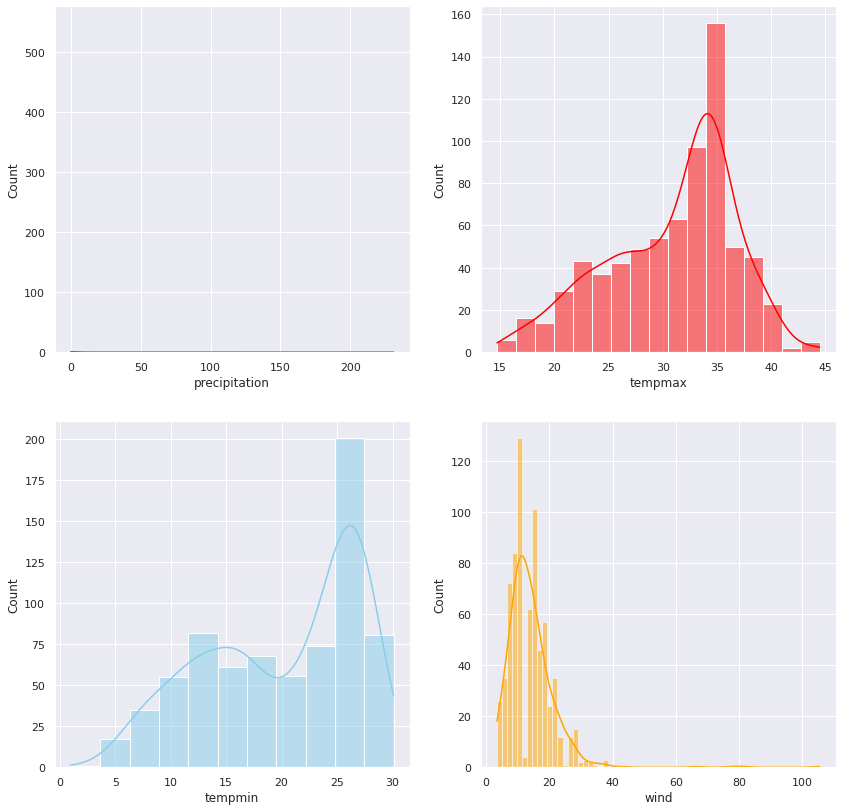

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(14,14))
sns.histplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=data,x="wind",kde=True,ax=axs[1,1],color='orange')

<AxesSubplot:xlabel='wind'>

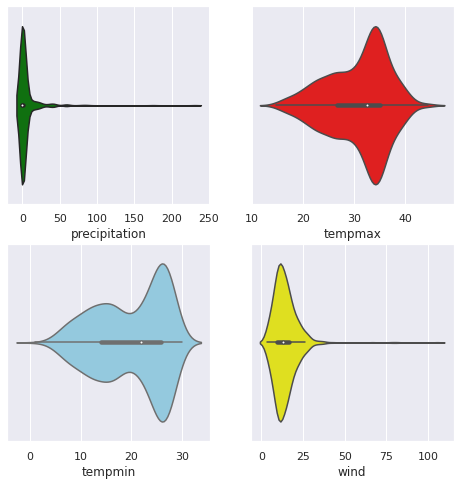

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(8,8))
sns.violinplot(data=data,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.violinplot(data=data,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.violinplot(data=data,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.violinplot(data=data,x="wind",kde=True,ax=axs[1,1],color='yellow')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precipitation', ylabel='weather'>

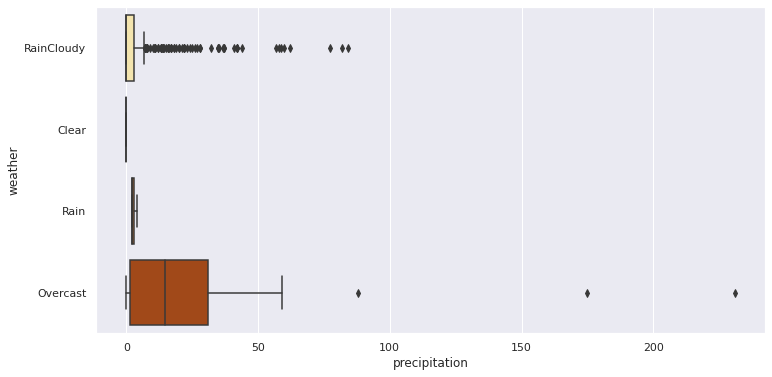

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot("precipitation","weather",data=data,palette="YlOrBr")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempmax', ylabel='weather'>

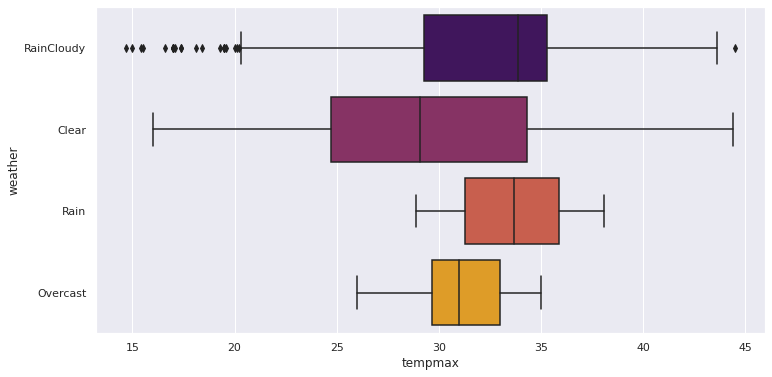

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmax","weather",data=data,palette="inferno")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind', ylabel='weather'>

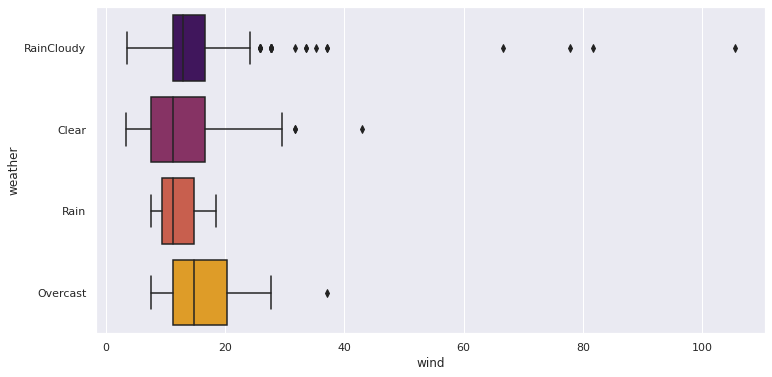

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot("wind","weather",data=data,palette="inferno")

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tempmin', ylabel='weather'>

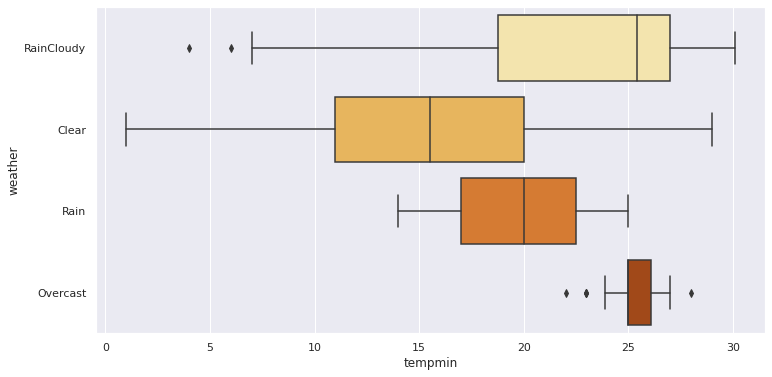

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot("tempmin","weather",data=data,palette="YlOrBr")

<AxesSubplot:>

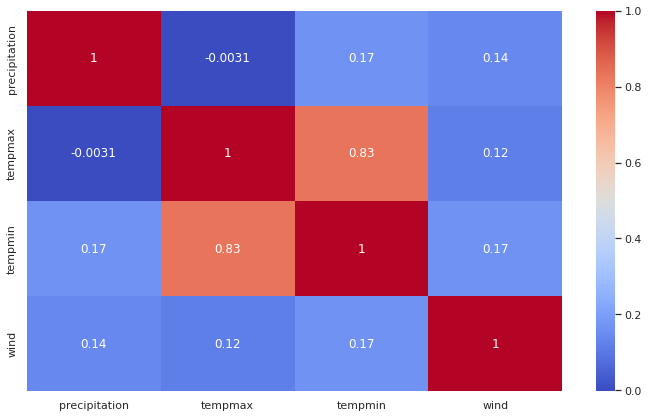

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

Pearson correlation: -0.0030612110006370944
T Test and P value: Ttest_indResult(statistic=-44.347539190405115, pvalue=9.0717115113185e-273)


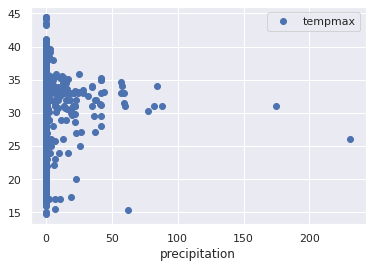

In [ ]:
data.plot("precipitation","tempmax",style='o')
print("Pearson correlation:",data["precipitation"].corr(data["tempmax"]))
print("T Test and P value:",stats.ttest_ind(data["precipitation"],data["tempmax"]))

Pearson correlation: 0.11651636248204048
T Test and P value: Ttest_indResult(statistic=-45.60491814169703, pvalue=4.5426385588531e-283)


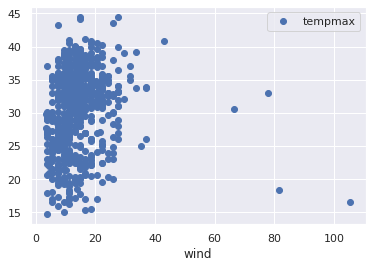

In [ ]:
data.plot("wind","tempmax",style='o')
print("Pearson correlation:",data["wind"].corr(data["tempmax"]))
print("T Test and P value:",stats.ttest_ind(data["wind"],data["tempmax"]))

Pearson correlation: 0.8341499427188674
T Test and P value: Ttest_indResult(statistic=32.25814082316522, pvalue=8.251258138328203e-173)


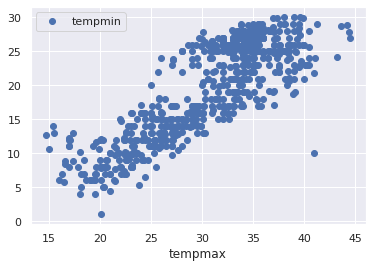

In [ ]:
data.plot("tempmax","tempmin",style='o')
print("Pearson correlation:",data["tempmax"].corr(data["tempmin"]))
print("T Test and P value:",stats.ttest_ind(data["tempmax"],data["tempmin"]))

In [ ]:
data.isna().sum()

datetime         0
precipitation    0
tempmax          0
tempmin          0
wind             0
weather          0
dtype: int64

In [ ]:
df=data.drop(["datetime"],axis=1)

In [ ]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

<AxesSubplot:xlabel='wind', ylabel='Count'>

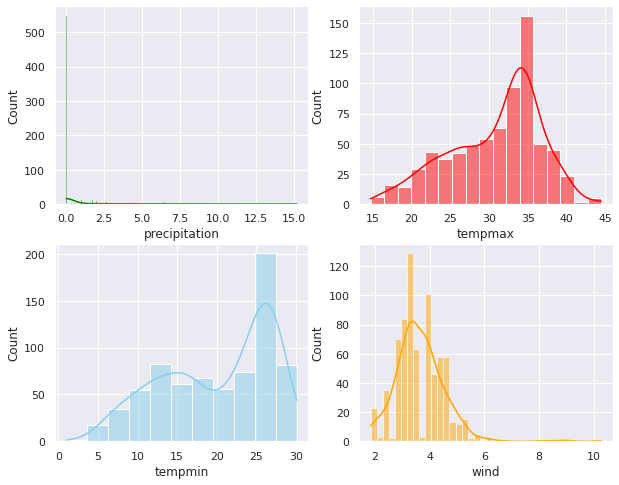

In [ ]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x="tempmax",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=df,x="tempmin",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [ ]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [ ]:
df.head()

,precipitation,tempmax,tempmin,wind,weather
0,0.000000,19.5,4.0,3.605551,RainCloudy
1,0.000000,22.6,9.0,3.346640,RainCloudy
2,4.795832,20.1,12.1,3.847077,RainCloudy
3,0.000000,19.3,11.0,3.065942,RainCloudy
4,0.000000,20.0,12.0,3.605551,RainCloudy


In [ ]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [ ]:
df.head()

,precipitation,tempmax,tempmin,wind,weather
0,0.000000,19.5,4.0,3.605551,3
1,0.000000,22.6,9.0,3.346640,3
2,4.795832,20.1,12.1,3.847077,3
3,0.000000,19.3,11.0,3.065942,3
4,0.000000,20.0,12.0,3.605551,3


In [ ]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values


In [ ]:
df.weather.unique()

array([3, 0, 2, 1])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
from sklearn.model_selection import train_test_split


x_train.shape, x_test.shape


((657, 4), (74, 4))

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:82.43%


In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       1.00      0.33      0.50         6
           3       0.79      0.89      0.84        38

    accuracy                           0.82        74
   macro avg       0.88      0.69      0.73        74
weighted avg       0.84      0.82      0.82        74



In [ ]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:81.08%


In [ ]:
print(metrics.classification_report(y_test,svm.predict(x_test)))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.00      0.00      0.00         6
           3       0.76      0.92      0.83        38

    accuracy                           0.81        74
   macro avg       0.55      0.58      0.57        74
weighted avg       0.75      0.81      0.78        74



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gbc=GradientBoostingClassifier(subsample=1,n_estimators=100,max_depth=3,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:78.38%


In [ ]:
print(metrics.classification_report(y_test,gbc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.50      0.17      0.25         6
           3       0.76      0.84      0.80        38

    accuracy                           0.78        74
   macro avg       0.70      0.61      0.63        74
weighted avg       0.77      0.78      0.77        74



In [ ]:

xgb=XGBClassifier()
xgb.fit(x_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(x_test,y_test)*100))

XGB Accuracy:82.43%


In [ ]:
print(metrics.classification_report(y_test,xgb.predict(x_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.50      0.17      0.25         6
           3       0.82      0.84      0.83        38

    accuracy                           0.82        74
   macro avg       0.72      0.65      0.66        74
weighted avg       0.81      0.82      0.81        74



In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Random Forest:{:.2f}%".format(clf.score(x_test,y_test)*100))

Random Forest:81.08%


In [ ]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85        30
           1       1.00      0.17      0.29         6
           3       0.77      0.89      0.83        38

    accuracy                           0.81        74
   macro avg       0.88      0.63      0.65        74
weighted avg       0.83      0.81      0.79        74



In [ ]:
#Decision Tree
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
print("Decision TRess:{:.2f}%".format(clf.score(x_test,y_test)*100))





Decision TRess:70.27%


In [ ]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 49.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  error: subprocess-exited-with-error
  
  × Running setup.py install for scikit-learn did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  

In [ ]:
from sklearn import tree

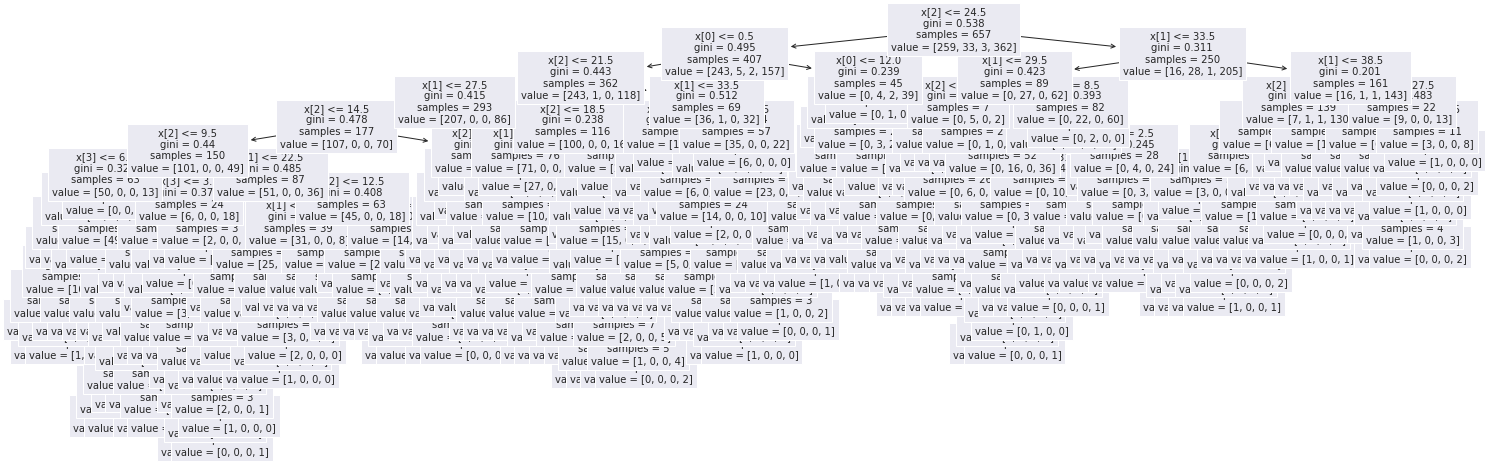

In [ ]:
plt.figure(figsize=(25,8))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=10)
plt.show()

In [ ]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68        30
           1       0.67      0.33      0.44         6
           3       0.69      0.82      0.75        38

    accuracy                           0.70        74
   macro avg       0.70      0.59      0.62        74
weighted avg       0.70      0.70      0.69        74



In [ ]:
input=[[2,28,14,18.4]]
ot=knn.predict(input)
print("The weather is:")
if(ot==3):
    print("RainCloud")
elif(ot==0):
    print("Clear")
elif(ot==2):
    print("Rain")
else:
    print("Overcast")

NameError: ignored

In [ ]:
 xgb.save_model("xgb_Kanpur.txt")

In [ ]:
import lightgbm as lgb

In [ ]:
from pprint import pprint

In [ ]:
model = lgb.LGBMClassifier(learning_rate=0.013,max_depth=-1,random_state=42)
model.fit(x_train,y_train,eval_set=[(x_test,y_test),(x_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.738629	training's multi_logloss: 0.738629	valid_0's multi_logloss: 0.784994	valid_0's multi_logloss: 0.784994
[40]	training's multi_logloss: 0.652655	training's multi_logloss: 0.652655	valid_0's multi_logloss: 0.682864	valid_0's multi_logloss: 0.682864
[60]	training's multi_logloss: 0.593234	training's multi_logloss: 0.593234	valid_0's multi_logloss: 0.613685	valid_0's multi_logloss: 0.613685
[80]	training's multi_logloss: 0.55001	training's multi_logloss: 0.55001	valid_0's multi_logloss: 0.565293	valid_0's multi_logloss: 0.565293
[100]	training's multi_logloss: 0.515237	training's multi_logloss: 0.515237	valid_0's multi_logloss: 0.527051	valid_0's multi_logloss: 0.527051


ModuleNotFoundError: ignored

ModuleNotFoundError: ignored

ModuleNotFoundError: ignored

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))

Training accuracy 0.8067
Testing accuracy 0.8243


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

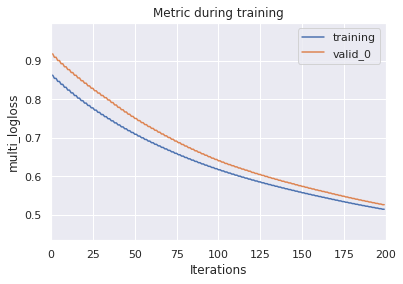

In [ ]:
lgb.plot_metric(model)


In [ ]:
lgb.plot_tree(model,figsize=(70,70))

In [ ]:
print(metrics.classification_report(y_test,model.predict(x_test)))